In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('exchange_data/set01.csv', header=0, squeeze=True)

In [3]:
data = data.set_index('Date')

In [4]:
#2018년 2월~2019년1월 train set/ 2019년 2월 test set
df_train=data.loc['2018-02-01': '2019-01-31' ]
df_test=data.loc['2019-02-01':]

### 모형구축

In [5]:
model_1 = ARIMA(df_train, order=(1,1,1))
model_1_fit = model_1.fit(trend='nc',full_output=True, disp=1)
print(model_1_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.668
Method:                       css-mle   S.D. of innovations              4.508
Date:                Fri, 07 Feb 2020   AIC                           1433.336
Time:                        15:33:07   BIC                           1443.827
Sample:                             1   HQIC                          1437.561
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate    -0.3835      0.293     -1.308      0.192      -0.958       0.191
ma.L1.D.Rate     0.4948      0.273      1.814      0.071      -0.040       1.030
                                    Roots   

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [6]:
model_2 = ARIMA(df_train, order=(1,1,1))
model_2_fit = model_2.fit(trend='c',full_output=True, disp=1)
print(model_2_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.472
Method:                       css-mle   S.D. of innovations              4.505
Date:                Fri, 07 Feb 2020   AIC                           1434.944
Time:                        15:33:07   BIC                           1448.933
Sample:                             1   HQIC                          1440.578
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.311      0.626      0.532      -0.415       0.805
ar.L1.D.Rate    -0.3870      0.292     -1.324      0.187      -0.960       0.186
ma.L1.D.Rate     0.4972      0.272      1.82

In [7]:
model_3 = ARIMA(df_train, order=(2,1,1))
model_3_fit = model_3.fit(trend='c',full_output=True, disp=1)
print(model_3_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -711.109
Method:                       css-mle   S.D. of innovations              4.460
Date:                Fri, 07 Feb 2020   AIC                           1432.219
Time:                        15:33:07   BIC                           1449.705
Sample:                             1   HQIC                          1439.261
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1900      0.178      1.066      0.288      -0.160       0.540
ar.L1.D.Rate     0.9504      0.099      9.620      0.000       0.757       1.144
ar.L2.D.Rate    -0.1599      0.065     -2.46

In [8]:
model_4 = ARIMA(df_train, order=(2,1,1))
model_4_fit = model_4.fit(trend='nc',full_output=True, disp=1)
print(model_4_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -711.637
Method:                       css-mle   S.D. of innovations              4.470
Date:                Fri, 07 Feb 2020   AIC                           1431.273
Time:                        15:33:07   BIC                           1445.262
Sample:                             1   HQIC                          1436.907
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     0.9386      0.101      9.293      0.000       0.741       1.137
ar.L2.D.Rate    -0.1592      0.064     -2.470      0.014      -0.285      -0.033
ma.L1.D.Rate    -0.8551      0.082    -10.37

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [9]:
model_5 = ARIMA(df_train, order=(2,1,2))
model_5_fit = model_5.fit(trend='nc',full_output=True, disp=1)
print(model_5_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -710.011
Method:                       css-mle   S.D. of innovations              4.435
Date:                Fri, 07 Feb 2020   AIC                           1430.023
Time:                        15:33:08   BIC                           1447.509
Sample:                             1   HQIC                          1437.065
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     1.8456      0.049     37.912      0.000       1.750       1.941
ar.L2.D.Rate    -0.9358      0.045    -20.902      0.000      -1.023      -0.848
ma.L1.D.Rate    -1.8678      0.055    -33.71

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
model_6 = ARIMA(df_train, order=(2,1,2))
model_6_fit = model_6.fit(trend='c',full_output=True, disp=1)
print(model_6_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -709.607
Method:                       css-mle   S.D. of innovations              4.427
Date:                Fri, 07 Feb 2020   AIC                           1431.214
Time:                        15:33:08   BIC                           1452.197
Sample:                             1   HQIC                          1439.665
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1872      0.207      0.904      0.367      -0.219       0.593
ar.L1.D.Rate     1.8424      0.052     35.536      0.000       1.741       1.944
ar.L2.D.Rate    -0.9333      0.048    -19.64

In [11]:
model_7 = ARIMA(df_train, order=(1,1,2))
model_7_fit = model_7.fit(trend='c',full_output=True, disp=1)
print(model_7_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -711.145
Method:                       css-mle   S.D. of innovations              4.461
Date:                Fri, 07 Feb 2020   AIC                           1432.289
Time:                        15:33:09   BIC                           1449.775
Sample:                             1   HQIC                          1439.331
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1914      0.178      1.077      0.283      -0.157       0.540
ar.L1.D.Rate     0.7770      0.117      6.657      0.000       0.548       1.006
ma.L1.D.Rate    -0.6968      0.128     -5.45

In [12]:
model_8 = ARIMA(df_train, order=(1,1,2))
model_8_fit = model_8.fit(trend='nc',full_output=True, disp=1)
print(model_8_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -711.677
Method:                       css-mle   S.D. of innovations              4.471
Date:                Fri, 07 Feb 2020   AIC                           1431.354
Time:                        15:33:09   BIC                           1445.342
Sample:                             1   HQIC                          1436.988
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     0.7627      0.117      6.509      0.000       0.533       0.992
ma.L1.D.Rate    -0.6782      0.128     -5.290      0.000      -0.929      -0.427
ma.L2.D.Rate    -0.1652      0.067     -2.46

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [13]:
model_9 = ARIMA(df_train, order=(4,1,3))
model_9_fit = model_9.fit(trend='nc',full_output=True, disp=1)
print(model_9_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -710.157
Method:                       css-mle   S.D. of innovations              4.417
Date:                Fri, 07 Feb 2020   AIC                           1436.314
Time:                        15:33:11   BIC                           1464.291
Sample:                             1   HQIC                          1447.582
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     0.4536      0.101      4.484      0.000       0.255       0.652
ar.L2.D.Rate    -0.6905      0.066    -10.397      0.000      -0.821      -0.560
ar.L3.D.Rate     0.8661      0.094      9.24

In [14]:
model_10 = ARIMA(df_train, order=(4,1,3))
model_10_fit = model_10.fit(trend='c',full_output=True, disp=1)
print(model_10_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -709.629
Method:                       css-mle   S.D. of innovations              4.408
Date:                Fri, 07 Feb 2020   AIC                           1437.259
Time:                        15:33:14   BIC                           1468.733
Sample:                             1   HQIC                          1449.935
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1901      0.178      1.066      0.288      -0.159       0.540
ar.L1.D.Rate     0.4653      0.099      4.701      0.000       0.271       0.659
ar.L2.D.Rate    -0.6855      0.067    -10.26

In [15]:
model_11 = ARIMA(df_train, order=(4,1,4))
model_11_fit = model_11.fit(trend='nc',full_output=True, disp=1)
print(model_11_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -707.935
Method:                       css-mle   S.D. of innovations              4.370
Date:                Fri, 07 Feb 2020   AIC                           1433.870
Time:                        15:33:16   BIC                           1465.344
Sample:                             1   HQIC                          1446.546
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     1.3042      0.056     23.224      0.000       1.194       1.414
ar.L2.D.Rate    -0.9066      0.068    -13.251      0.000      -1.041      -0.773
ar.L3.D.Rate     1.2852      0.064     20.05

In [16]:
model_12 = ARIMA(df_train, order=(4,1,4))
model_12_fit = model_12.fit(trend='c',full_output=True, disp=1)
print(model_12_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -707.532
Method:                       css-mle   S.D. of innovations              4.363
Date:                Fri, 07 Feb 2020   AIC                           1435.065
Time:                        15:33:18   BIC                           1470.037
Sample:                             1   HQIC                          1449.150
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1892      0.210      0.901      0.368      -0.222       0.601
ar.L1.D.Rate     1.3014      0.058     22.258      0.000       1.187       1.416
ar.L2.D.Rate    -0.9067      0.069    -13.21

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [17]:
model_13 = ARIMA(df_train, order=(5,1,4))
model_13_fit = model_13.fit(trend='c',full_output=True, disp=1)
print(model_13_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -706.241
Method:                       css-mle   S.D. of innovations              4.357
Date:                Fri, 07 Feb 2020   AIC                           1434.483
Time:                        15:33:21   BIC                           1472.951
Sample:                             1   HQIC                          1449.976
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1875      0.221      0.847      0.398      -0.246       0.621
ar.L1.D.Rate     0.3576      0.101      3.543      0.000       0.160       0.555
ar.L2.D.Rate     0.9379      0.097      9.67

In [18]:
model_14 = ARIMA(df_train, order=(5,1,4))
model_14_fit = model_14.fit(trend='nc',full_output=True, disp=1)
print(model_14_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -706.775
Method:                       css-mle   S.D. of innovations              4.375
Date:                Fri, 07 Feb 2020   AIC                           1433.551
Time:                        15:33:23   BIC                           1468.523
Sample:                             1   HQIC                          1447.636
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate     0.2594      0.200      1.300      0.195      -0.132       0.650
ar.L2.D.Rate     1.2241      0.273      4.480      0.000       0.689       1.760
ar.L3.D.Rate    -0.0613      0.130     -0.47

In [19]:
model_15 = ARIMA(df_train, order=(5,1,3))
model_15_fit = model_15.fit(trend='nc',full_output=True, disp=1)
print(model_15_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -708.931
Method:                       css-mle   S.D. of innovations              4.419
Date:                Fri, 07 Feb 2020   AIC                           1435.862
Time:                        15:33:24   BIC                           1467.337
Sample:                             1   HQIC                          1448.539
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate    -0.5212      0.274     -1.900      0.059      -1.059       0.016
ar.L2.D.Rate     0.4462      0.196      2.278      0.024       0.062       0.830
ar.L3.D.Rate     0.4255      0.181      2.35

In [20]:
model_16 = ARIMA(df_train, order=(5,1,3))
model_16_fit = model_16.fit(trend='c',full_output=True, disp=1)
print(model_16_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -708.415
Method:                       css-mle   S.D. of innovations              4.410
Date:                Fri, 07 Feb 2020   AIC                           1436.831
Time:                        15:33:25   BIC                           1471.802
Sample:                             1   HQIC                          1450.915
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1870      0.179      1.044      0.298      -0.164       0.538
ar.L1.D.Rate    -0.5100      0.274     -1.864      0.064      -1.046       0.026
ar.L2.D.Rate     0.4625      0.192      2.41

In [21]:
model_17 = ARIMA(df_train, order=(5,1,2))
model_17_fit = model_17.fit(trend='c',full_output=True, disp=1)
print(model_17_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -710.360
Method:                       css-mle   S.D. of innovations              4.446
Date:                Fri, 07 Feb 2020   AIC                           1438.720
Time:                        15:33:26   BIC                           1470.194
Sample:                             1   HQIC                          1451.396
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1877      0.265      0.707      0.480      -0.332       0.708
ar.L1.D.Rate    -0.9334      0.466     -2.001      0.047      -1.848      -0.019
ar.L2.D.Rate    -0.3354      0.396     -0.84

In [22]:
model_18 = ARIMA(df_train, order=(5,1,2))
model_18_fit = model_18.fit(trend='nc',full_output=True, disp=1)
print(model_18_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -710.608
Method:                       css-mle   S.D. of innovations              4.451
Date:                Fri, 07 Feb 2020   AIC                           1437.216
Time:                        15:33:27   BIC                           1465.194
Sample:                             1   HQIC                          1448.484
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate    -0.9454      0.456     -2.072      0.039      -1.840      -0.051
ar.L2.D.Rate    -0.3433      0.385     -0.892      0.373      -1.097       0.411
ar.L3.D.Rate    -0.0410      0.093     -0.44

In [23]:
model_19 = ARIMA(df_train, order=(5,1,1))
model_19_fit = model_19.fit(trend='nc',full_output=True, disp=1)
print(model_19_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -710.828
Method:                       css-mle   S.D. of innovations              4.455
Date:                Fri, 07 Feb 2020   AIC                           1435.656
Time:                        15:33:27   BIC                           1460.136
Sample:                             1   HQIC                          1445.515
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate    -0.5972      0.224     -2.668      0.008      -1.036      -0.158
ar.L2.D.Rate    -0.0098      0.077     -0.128      0.898      -0.160       0.141
ar.L3.D.Rate    -0.0515      0.077     -0.67

In [24]:
model_20 = ARIMA(df_train, order=(5,1,1))
model_20_fit = model_20.fit(trend='c',full_output=True, disp=1)
print(model_20_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -710.551
Method:                       css-mle   S.D. of innovations              4.450
Date:                Fri, 07 Feb 2020   AIC                           1437.102
Time:                        15:33:28   BIC                           1465.079
Sample:                             1   HQIC                          1448.370
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1885      0.252      0.747      0.456      -0.306       0.683
ar.L1.D.Rate    -0.5967      0.225     -2.653      0.009      -1.037      -0.156
ar.L2.D.Rate    -0.0130      0.077     -0.16

In [25]:
model_21 = ARIMA(df_train, order=(5,1,5))
model_21_fit = model_21.fit(trend='nc',full_output=True, disp=1)
print(model_21_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -706.506
Method:                       css-mle   S.D. of innovations              4.344
Date:                Fri, 07 Feb 2020   AIC                           1435.013
Time:                        15:33:38   BIC                           1473.482
Sample:                             1   HQIC                          1450.506
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ar.L1.D.Rate    -0.0805      0.609     -0.132      0.895      -1.274       1.113
ar.L2.D.Rate     1.0845      0.193      5.626      0.000       0.707       1.462
ar.L3.D.Rate     0.6781      0.588      1.15

In [27]:
model_22 = ARIMA(df_train, order=(5,1,5))
model_22_fit = model_22.fit(trend='c',full_output=True, disp=1)
print(model_22_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -706.295
Method:                       css-mle   S.D. of innovations              4.341
Date:                Fri, 07 Feb 2020   AIC                           1436.590
Time:                        15:33:57   BIC                           1478.556
Sample:                             1   HQIC                          1453.491
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1853      0.219      0.846      0.398      -0.244       0.615
ar.L1.D.Rate     0.0695      0.510      0.136      0.892      -0.929       1.068
ar.L2.D.Rate     0.8732      0.217      4.02

In [28]:
model_23 = ARIMA(df_train, order=(5,0,5))
model_23_fit = model_23.fit(trend='c',full_output=True, disp=1)
print(model_23_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   Rate   No. Observations:                  245
Model:                     ARMA(5, 5)   Log Likelihood                -713.068
Method:                       css-mle   S.D. of innovations              4.411
Date:                Fri, 07 Feb 2020   AIC                           1450.136
Time:                        15:33:59   BIC                           1492.151
Sample:                             0   HQIC                          1467.056
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1101.2729     17.300     63.656      0.000    1067.365    1135.181
ar.L1.Rate     0.3652      0.561      0.650      0.516      -0.735       1.466
ar.L2.Rate     0.7860      0.380      2.067      0.0

In [29]:
#non값 사용 불가능
model_24 = ARIMA(df_train, order=(5,0,0))
model_24_fit = model_24.fit(trend='nc',full_output=True, disp=1)
print(model_24_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   Rate   No. Observations:                  245
Model:                     ARMA(5, 0)   Log Likelihood                -723.330
Method:                       css-mle   S.D. of innovations              4.472
Date:                Fri, 07 Feb 2020   AIC                           1458.660
Time:                        15:34:01   BIC                           1479.668
Sample:                             0   HQIC                          1467.120
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.Rate     1.1031   1.09e-05   1.01e+05      0.000       1.103       1.103
ar.L2.Rate    -0.1788    2.3e-06  -7.76e+04      0.000      -0.179      -0.179
ar.L3.Rate     0.0848        nan        nan        n

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\sm.woo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\sm.woo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\sm.woo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [30]:
model_25 = ARIMA(df_train, order=(5,0,0))
model_25_fit = model_25.fit(trend='c',full_output=True, disp=1)
print(model_25_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                   Rate   No. Observations:                  245
Model:                     ARMA(5, 0)   Log Likelihood                -715.992
Method:                       css-mle   S.D. of innovations              4.465
Date:                Fri, 07 Feb 2020   AIC                           1445.983
Time:                        15:34:01   BIC                           1470.492
Sample:                             0   HQIC                          1455.853
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1101.6001     15.101     72.947      0.000    1072.002    1131.198
ar.L1.Rate     1.0940      0.063     17.238      0.000       0.970       1.218
ar.L2.Rate    -0.1830      0.094     -1.941      0.0

In [31]:
model_26 = ARIMA(df_train, order=(0,1,5))
model_26_fit = model_26.fit(trend='nc',full_output=True, disp=1)
print(model_26_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -710.420
Method:                       css-mle   S.D. of innovations              4.447
Date:                Fri, 07 Feb 2020   AIC                           1432.840
Time:                        15:34:02   BIC                           1453.823
Sample:                             1   HQIC                          1441.291
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.Rate     0.0989      0.065      1.524      0.129      -0.028       0.226
ma.L2.D.Rate    -0.0963      0.065     -1.490      0.137      -0.223       0.030
ma.L3.D.Rate    -0.0448      0.062     -0.71

In [32]:
model_27 = ARIMA(df_train, order=(0,1,5))
model_27_fit = model_27.fit(trend='c',full_output=True, disp=1)
print(model_27_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -709.966
Method:                       css-mle   S.D. of innovations              4.439
Date:                Fri, 07 Feb 2020   AIC                           1433.933
Time:                        15:34:02   BIC                           1458.413
Sample:                             1   HQIC                          1443.792
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1861      0.192      0.971      0.333      -0.190       0.562
ma.L1.D.Rate     0.0949      0.065      1.463      0.145      -0.032       0.222
ma.L2.D.Rate    -0.1017      0.065     -1.57

In [33]:
model_28 = ARIMA(df_train, order=(0,1,4))
model_28_fit = model_28.fit(trend='nc',full_output=True, disp=1)
print(model_28_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -712.520
Method:                       css-mle   S.D. of innovations              4.487
Date:                Fri, 07 Feb 2020   AIC                           1435.040
Time:                        15:34:02   BIC                           1452.525
Sample:                             1   HQIC                          1442.082
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ma.L1.D.Rate     0.0760      0.066      1.155      0.249      -0.053       0.205
ma.L2.D.Rate    -0.0761      0.067     -1.132      0.259      -0.208       0.056
ma.L3.D.Rate    -0.0456      0.070     -0.65

In [34]:
model_29 = ARIMA(df_train, order=(0,1,4))
model_29_fit = model_29.fit(trend='c',full_output=True, disp=1)
print(model_29_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rate   No. Observations:                  244
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -712.221
Method:                       css-mle   S.D. of innovations              4.481
Date:                Fri, 07 Feb 2020   AIC                           1436.443
Time:                        15:34:02   BIC                           1457.426
Sample:                             1   HQIC                          1444.893
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1867      0.239      0.780      0.436      -0.282       0.656
ma.L1.D.Rate     0.0719      0.066      1.091      0.277      -0.057       0.201
ma.L2.D.Rate    -0.0802      0.067     -1.18

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [35]:
model_30 = ARIMA(df_train, order=(5,2,5))
model_30_fit = model_30.fit(trend='nc',full_output=True, disp=1)
print(model_30_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D2.Rate   No. Observations:                  243
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -709.188
Method:                       css-mle   S.D. of innovations              4.419
Date:                Fri, 07 Feb 2020   AIC                           1440.376
Time:                        15:34:04   BIC                           1478.800
Sample:                             2   HQIC                          1455.853
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D2.Rate    -0.5660      0.712     -0.795      0.428      -1.962       0.830
ar.L2.D2.Rate     0.4044      0.644      0.628      0.531      -0.857       1.666
ar.L3.D2.Rate     0.4511      0.386     

In [36]:
model_31 = ARIMA(df_train, order=(5,2,5))
model_31_fit = model_31.fit(trend='c',full_output=True, disp=1)
print(model_31_fit.summary())

C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\sm.woo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D2.Rate   No. Observations:                  243
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -709.007
Method:                       css-mle   S.D. of innovations              4.416
Date:                Fri, 07 Feb 2020   AIC                           1442.014
Time:                        15:34:08   BIC                           1483.931
Sample:                             2   HQIC                          1458.897
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0016      0.003     -0.603      0.547      -0.007       0.004
ar.L1.D2.Rate    -0.5667      0.708     -0.800      0.424      -1.954       0.821
ar.L2.D2.Rate     0.4065      0.634     

### 예측

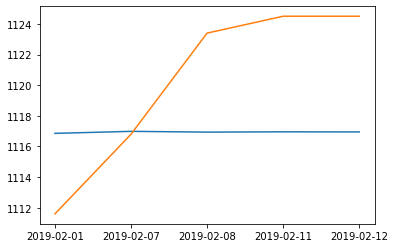

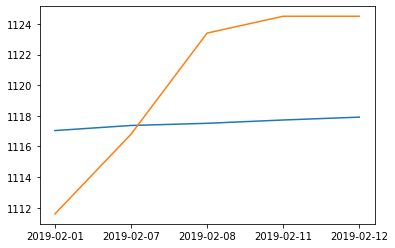

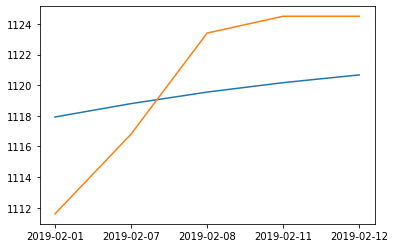

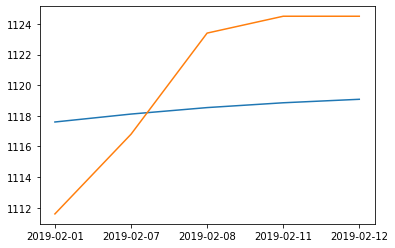

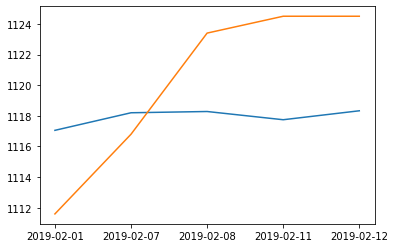

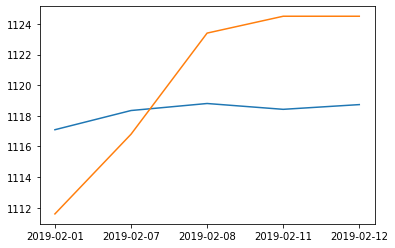

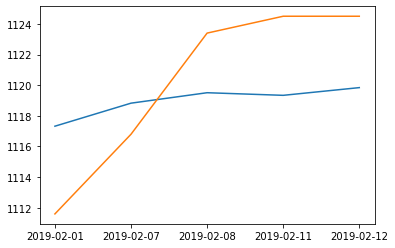

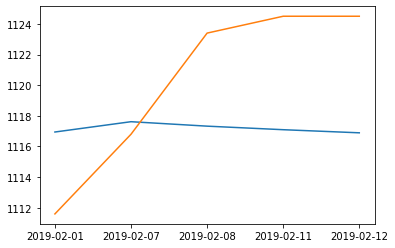

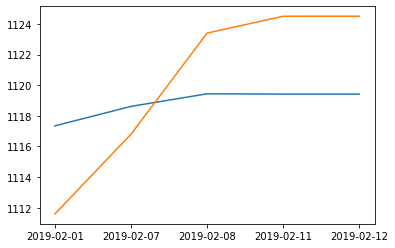

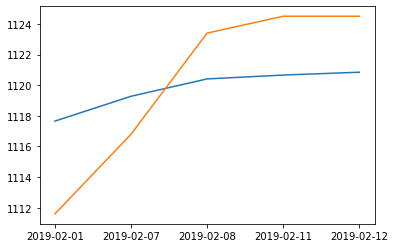

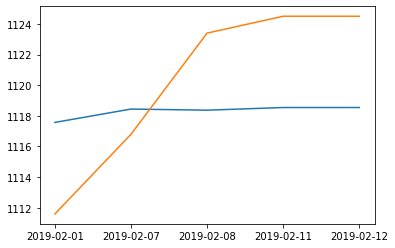

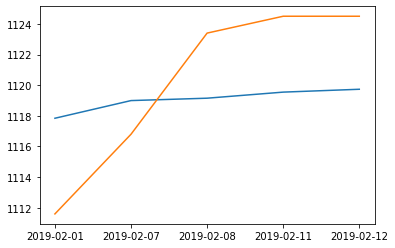

In [105]:
Models = [model_1_fit, model_2_fit, model_3_fit, model_4_fit, model_18_fit, model_19_fit, model_20_fit, 
          model_25_fit, model_26_fit, model_27_fit, model_28_fit, model_29_fit]

df_test=df_test[:5]
actual_price=df_test['Rate'].tolist()[:5]
RMSE_total=[]
pred_price=[]

for model in Models:
    pred = model.forecast(steps=5)
    pred_price_0=pred[0][:5]
    pred_price.extend(pred_price_0)

    plt.plot(pred_price_0)
    plt.plot(df_test)
    plt.show()
    
    RMSE = mean_squared_error(pred_price_0, actual_price)**0.5    
    RMSE_total.append(RMSE)

#### 예측값, stderr, upper bound, lower bound

In [106]:
n = 5
result = [pred_price[i * n:(i + 1) * n] for i in range((len(pred_price) + n - 1) // n )] 
pred_final = []
for i in result:
    pred_final.append(i)

In [107]:
pred_final=pd.DataFrame(pred_final)
RMSE_total=pd.DataFrame(RMSE_total)
final_df=pd.concat([pred_final, RMSE_total], axis=1)
final_df.columns=[df_test.index[0],df_test.index[1],df_test.index[2],df_test.index[3],df_test.index[4],'RMSE']

In [108]:
actual_price = pd.DataFrame(actual_price + [0]).T
actual_price.columns=[df_test.index[0],df_test.index[1],df_test.index[2],df_test.index[3],df_test.index[4],'RMSE']
final_df=pd.concat([actual_price, final_df], axis=0)
final_df

In [114]:
final_df.to_csv('data/final01.csv', index=False)